In [53]:
import pandas as pd
import numpy as np

In [54]:
data = pd.read_csv('scale.csv')
data = data.drop(data.columns[0:11], axis=1)
for key,item in enumerate(data.columns):
    print(f"{key}, {item}")
c = data.columns
data_head = data.loc[:, c[0]:c[1]]

0, 1.请输入实验编号
1, 2.请选择实验轮次
2, 3.系统感知可用性:我认为我会愿意经常使用本系统
3, 3.系统感知可用性:我发现这个系统没必要这么复杂
4, 3.系统感知可用性:我认为该系统容易使用
5, 3.系统感知可用性:我认为我会需要技术人员的支持才能使用该系统
6, 3.系统感知可用性:我发现这个系统中的不同功能被较好地整合一起
7, 3.系统感知可用性:我认为这个系统太不一致了
8, 3.系统感知可用性:我认为大部分人会很快学会使用这个系统
9, 3.系统感知可用性:我发现这个系统使用起来非常笨拙
10, 3.系统感知可用性:对于使用这个系统，我感到很自信
11, 3.系统感知可用性:在我可以使用该系统之前，我需要学习很多东西
12, 4.有效性:它使我的工作更有效
13, 4.有效性:它使我的工作更有产出
14, 4.有效性:它是有用的
15, 4.有效性:它给我更多的控制以管理生活中的各项活动
16, 4.有效性:它使我能够更加容易地完成要做的事情
17, 4.有效性:使用时，它节省了我的时间
18, 4.有效性:它满足我的需求
19, 4.有效性:它可以执行我期望它做的所有事情
20, 5.易用性:它容易使用
21, 5.易用性:它操作简单
22, 5.易用性:它是用户友好的
23, 5.易用性:对于我需要完成的事情，它需要最可能少的步骤
24, 5.易用性:它是灵活的
25, 5.易用性:使用起来不费力气
26, 5.易用性:没有书面说明，我可以使用它
27, 5.易用性:在使用过程中，我没有发现任何不一致
28, 5.易用性:偶尔使用和常规使用的用户都会喜欢它
29, 5.易用性:出错时，我可以迅速且容易地恢复过来
30, 5.易用性:每次我都可以成功地使用它
31, 6.易学性:我可以迅速地学会使用它
32, 6.易学性:我容易记住如何使用它
33, 6.易学性:学起来容易
34, 6.易学性:很快我就可以熟练使用它了
35, 7.满意度:我对它满意
36, 7.满意度:我会把它推荐给朋友
37, 7.满意度:使用起来有趣
38, 7.满意度:它以我所希望的方式工作
39, 7.满意度:它很好
40, 7.满意度:我感到我需要拥有它
41, 7.满意度:使用起来令人愉快
42, 8.场景比较:系统的整体可用性
43, 8.场景比较:

In [55]:
sus_data = data.loc[:, c[2]:c[11]]
for key,item in enumerate(sus_data.columns):
    print(f"{key}, {item}")

sus_data_c = sus_data.columns

0, 3.系统感知可用性:我认为我会愿意经常使用本系统
1, 3.系统感知可用性:我发现这个系统没必要这么复杂
2, 3.系统感知可用性:我认为该系统容易使用
3, 3.系统感知可用性:我认为我会需要技术人员的支持才能使用该系统
4, 3.系统感知可用性:我发现这个系统中的不同功能被较好地整合一起
5, 3.系统感知可用性:我认为这个系统太不一致了
6, 3.系统感知可用性:我认为大部分人会很快学会使用这个系统
7, 3.系统感知可用性:我发现这个系统使用起来非常笨拙
8, 3.系统感知可用性:对于使用这个系统，我感到很自信
9, 3.系统感知可用性:在我可以使用该系统之前，我需要学习很多东西


## SUS 评分

In [56]:
# sus_scale = sus_data[sus_data_c[2]] + sus_data[sus_data_c[3]]

sus_scale = 0

for i in range(0, 9):
    if i % 2 == 0:
        sus_scale += sus_data[sus_data_c[i]] - 1
    else:
        sus_scale += 5 - sus_data[sus_data_c[i]]
    

data_head = data_head.assign(sus=sus_scale*2.5)


## USE 有效性评分

In [57]:
effect_data = data.loc[:, c[12]:c[19]]
effect_data[c[18]] = effect_data[c[18]].apply(lambda x: x*0.8)

data_head = data_head.assign(effect=effect_data.sum(axis=1))


## USE 易用性名评分

In [58]:
easy_use_data_r = data.loc[:, c[20]:c[23]]
easy_use_data_s = data.loc[:, c[24]:c[30]]
data_head = data_head.assign(easy=easy_use_data_r.sum(axis=1) + easy_use_data_s.sum(axis=1) * 0.8)

### USE 易学性评分

In [59]:
easy_learn_data_n = data.loc[:, c[31]:c[33]]
easy_learn_data_s = data.loc[:, c[34]:c[34]]
data_head = data_head.assign(easy_learn=easy_learn_data_n.sum(axis=1) + 0.8 * easy_learn_data_s.sum(axis=1))

### USE 满意度评分

In [60]:
satisfaction_data = data.loc[:, c[35]:c[41]]
data_head = data_head.assign(satisfaction=satisfaction_data.sum(axis=1))

In [61]:
res = data_head

In [62]:
res.rename(columns={"1.请输入实验编号": "subject_id", "2.请选择实验轮次":"task_round"}, inplace=True)


In [63]:
res["task_round"].replace({"A.第一轮（WIMP）": 0, "B.第二轮（M-CAT）":1}, inplace=True)


In [64]:
grouped_res = res.groupby(["subject_id","task_round"]).mean().groupby("task_round")
grouped_res.mean()

,sus,effect,easy,easy_learn,satisfaction
task_round,,,,,
0,53.214286,36.752381,42.590476,17.809524,31.190476
1,73.571429,49.961905,61.828571,25.485714,46.857143


In [65]:
grouped_res.std()
res

,subject_id,task_round,sus,effect,easy,easy_learn,satisfaction
0,202,1,77.5,52.6,64.6,26.6,45
1,202,0,85.0,51.6,61.4,24.8,44
2,206,1,57.5,49.6,58.8,24.0,48
3,206,0,55.0,43.0,50.8,19.2,34
4,205,1,60.0,48.8,64.0,26.6,49
5,205,0,75.0,37.0,52.6,26.6,35
6,204,1,85.0,49.6,60.2,23.8,48
7,204,0,47.5,41.0,50.8,19.8,42
8,203,1,67.5,51.8,58.6,24.8,46
9,203,0,67.5,41.8,51.0,22.0,42


In [66]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(["light","no-latex"])
plt.rcParams ['font.sans-serif'] = ['Arial Unicode MS']  # 汉字显示

plt.rcParams.update({
    "font.family": "sans-serif",   # specify font family here
    "font.size":16})          # specify font size here


## 分组样本数据

In [67]:
from scipy import stats
def t_bar_data(df: pd.DataFrame, column: list[str]):
    round_0 = df[df["task_round"] == 0].loc[:, column]
    round_1 = df[df["task_round"] == 1].loc[:, column]
    round_0_mean = round_0.mean()
    round_0_std = round_0.std()
    round_0_std_error = round_0_std / np.sqrt(len(round_0))
    round_0_99 = stats.t.interval(0.95, len(round_0)-1, loc=round_0_mean, scale=round_0_std_error)
    round_0_99_diff = (round_0_99[1] - round_0_99[0])/2
    round_1_mean = round_1.mean()
    round_1_std = round_1.std()
    round_1_std_error = round_1_std / np.sqrt(len(round_1))
    round_1_99 = stats.t.interval(0.95, len(round_1)-1, loc=round_1_mean, scale=round_1_std_error)
    round_1_99_diff = (round_1_99[1] - round_1_99[0])/2
    return  [[round_0_mean, round_1_mean], [round_0_99_diff, round_1_99_diff]]

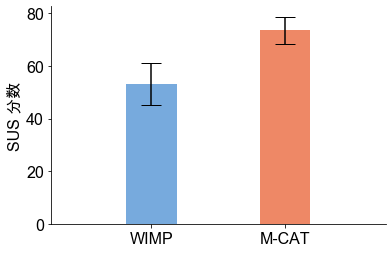

In [68]:
mean, diff = t_bar_data(res, ["sus"])

plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots()
# 绘制条形图
plt.bar(-2, mean[0], width=1.5, label='WIMP', yerr=diff[0], capsize=10)
plt.bar(2, mean[1], width=1.5, label='M-CAT', yerr=diff[1], capsize=10)
# 设置标题、标签和图例
plt.xlim(-5, 5)
plt.title('Comparison of Two Data')
plt.xlabel('')
plt.xticks([-2, 2], ["WIMP", "M-CAT"])
plt.ylabel('SUS 分数')
plt.title("")


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.legend()

plt.savefig('./temp.png', bbox_inches='tight')
with open('./temp.png', 'rb') as f:
    img = f.read()


# 显示图形
plt.show()


import numpy as np
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(round_0_mean.index))
width = 0.35
ax.bar(x - width/2 - 0.1,round_0_mean, width, yerr=round_0_99_diff, label="WIMP 界面",error_kw=dict(ecolor='black', lw=1, capsize=5, capthick=1))
ax.bar(x + width/2 + 0.1, round_1_mean, width, yerr=round_1_99_diff, label="M-CAT 界面",error_kw=dict(ecolor='black', lw=1, capsize=5, capthick=1))

ax.set_ylabel("分数")
ax.set_xticks(x)
ax.set_xticklabels(round_0_mean.index)
ax.set_title("WIMP和M-CAT的主观体验报告对比")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor((1,1,1, 0))
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
ax.legend()
fig.set_facecolor("white")
plt.show()

In [69]:
from scipy import stats

In [70]:
def anova(col: str):
    return stats.f_oneway(res.loc[res['task_round'] == 0, col], res.loc[res['task_round'] == 1, col])

In [71]:
anova("sus")
anova("effect")

F_onewayResult(statistic=44.70970066003533, pvalue=5.1365800604653014e-08)

In [78]:
res = round(res, 3)
res.to_csv("./scale_origin.csv", index=False)

,subject_id,task_round,sus,effect,easy,easy_learn,satisfaction
0,202,1,77.5,52.6,64.6,26.6,45
1,202,0,85.0,51.6,61.4,24.8,44
2,206,1,57.5,49.6,58.8,24.0,48
3,206,0,55.0,43.0,50.8,19.2,34
4,205,1,60.0,48.8,64.0,26.6,49
5,205,0,75.0,37.0,52.6,26.6,35
6,204,1,85.0,49.6,60.2,23.8,48
7,204,0,47.5,41.0,50.8,19.8,42
8,203,1,67.5,51.8,58.6,24.8,46
9,203,0,67.5,41.8,51.0,22.0,42


In [73]:
import pandas as pd
import numpy as np
from scipy import stats

def summary(df):
    summary_df = pd.DataFrame(columns=['column_name', 'sample_size', 'mean', 'std', 'std_error', 'ci_lower', 'ci_upper', 'min', 'max'])
    dfs = []
    
    for column in df.columns:
        data = df[column]
        n = len(data)
        mean = np.mean(data)
        std = np.std(data)
        std_error = std / np.sqrt(n)
        ci = stats.t.interval(0.95, n-1, loc=mean, scale=std_error)
        ci_lower = ci[0]
        ci_upper = ci[1]

        minimum = np.min(data)
        maximum = np.max(data)
        
        dfs.append(pd.DataFrame({'column_name': column, 'sample_size': n, 'mean': mean, 
                                 'std': std, 'std_error': std_error, 'ci_lower': ci_lower, 
                                 'ci_upper': ci_upper, 'min': minimum, 'max': maximum}, index=[0]))
    
    summary_df = pd.concat(dfs, ignore_index=True)
    
    return summary_df

In [74]:
describe_0 = summary(res.loc[res["task_round"] == 0].drop(["subject_id", "task_round"], axis=1))
describe_1 =  summary(res.loc[res["task_round"] == 1].drop(["subject_id", "task_round"], axis=1))
describe_all = pd.concat([describe_0.assign(task_round=0), describe_1.assign(task_round=1)], ignore_index=True)
describe_all = describe_all.reindex(columns=['task_round', 'column_name', 'sample_size', 'mean', 'std', 'std_error', 'ci_lower', 'ci_upper', 'min', 'max'])

In [75]:
describe_all

,task_round,column_name,sample_size,mean,std,std_error,ci_lower,ci_upper,min,max
0,0,sus,21,53.214286,17.010901,3.712083,45.471016,60.957555,20.0,87.5
1,0,effect,21,36.752381,7.993070,1.744231,33.113979,40.390783,20.6,51.6
2,0,easy,21,42.590476,10.928421,2.384777,37.615919,47.565034,22.0,61.4
3,0,easy_learn,21,17.809524,4.831041,1.054220,15.610460,20.008587,8.6,26.6
4,0,satisfaction,21,31.190476,8.638888,1.885160,27.258102,35.122851,18.0,44.0
5,1,sus,21,73.571429,11.034886,2.408010,68.548409,78.594448,50.0,90.0
6,1,effect,21,49.961905,3.763797,0.821328,48.248645,51.675165,43.8,54.6
7,1,easy,21,61.828571,4.733381,1.032908,59.673962,63.983181,51.0,67.2
8,1,easy_learn,21,25.485714,1.528861,0.333625,24.789785,26.181643,21.0,26.6
9,1,satisfaction,21,46.857143,2.531435,0.552404,45.704847,48.009438,40.0,49.0


In [76]:
describe_all.to_csv("describe_all_scale.csv", index=False)